In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
data = pd.read_csv("extracted.csv")

In [3]:
data.head()

,label,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate
0,male,-366.600128,149.642456,-10.056374,30.164534,-7.584357,18.330887,-27.980854,12.858466,-13.769093,4.823813,3.135750,-3.442157,-0.029611,1722.189075,1631.192379,3223.647174,0.104314
1,male,-249.262421,97.911964,-20.877308,58.878952,-36.129013,32.418461,-32.754017,13.661685,-14.513299,-0.635688,-0.217982,-8.376599,5.705587,2486.438634,2086.358202,4937.964333,0.145963
2,male,-340.042175,130.879730,-19.663383,64.668861,-11.158972,4.310546,-22.442085,-2.721252,-12.942378,-2.650300,-6.830675,-9.462445,-2.776426,1601.961047,1498.062813,3008.416212,0.093761
3,male,-192.684708,140.559921,-19.272806,61.045609,-24.022766,9.796226,-27.657021,1.120323,-13.819197,-10.508233,-2.806213,-14.666139,-8.412861,1406.974685,1606.067487,2980.395621,0.069983
4,male,-224.602371,168.698029,-59.176102,24.212582,-27.015240,7.311257,-25.801052,-2.948525,-3.749261,1.250994,-1.152871,-3.895688,-0.785262,1462.973272,1352.225341,2739.382324,0.086740


In [4]:
data.shape

(5993, 18)

### Encoding Label

In [5]:
label_encoder = LabelEncoder()

data['label'] = label_encoder.fit_transform(data['label'])

In [6]:
dict(enumerate(label_encoder.classes_))

{0: 'female', 1: 'male'}

### Splitting and Scalling

In [7]:
y = data['label'].copy()
X = data.drop('label', axis=1).copy()

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

### Modeling and Training¶

In [10]:
X.shape

(5993, 17)

In [11]:
inputs = tf.keras.Input(shape=(X.shape[1],))

x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

In [12]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,377 (21.00 KB)

 Trainable params: 5,377 (21.00 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=100, callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6753 - auc: 0.7281 - loss: 0.5897 - val_accuracy: 0.7843 - val_auc: 0.8566 - val_loss: 0.4641
Epoch 2/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8323 - auc: 0.8929 - loss: 0.4046 - val_accuracy: 0.8057 - val_auc: 0.8655 - val_loss: 0.4524
Epoch 3/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8498 - auc: 0.9066 - loss: 0.3738 - val_accuracy: 0.8010 - val_auc: 0.8659 - val_loss: 0.4564
Epoch 4/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8383 - auc: 0.9063 - loss: 0.3745 - val_accuracy: 0.8117 - val_auc: 0.8680 - val_loss: 0.4584
Epoch 5/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8495 - auc: 0.9113 - loss: 0.3683 - val_accuracy: 0.8010 - val_auc: 0.8684 - val_loss: 0.4511
Epoch 6/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8475 - auc: 0.9145 - loss: 0.3573 - val_accuracy: 0.8117 - val_auc: 0.8676 - val_loss: 0.4550
Epoch 7/100
105/105 ━━━━━━━━━━━━━━

In [14]:
model.evaluate(X_test, y_test)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8189 - auc: 0.8939 - loss: 0.4132


[0.4059064984321594, 0.8225806355476379, 0.8943133354187012]

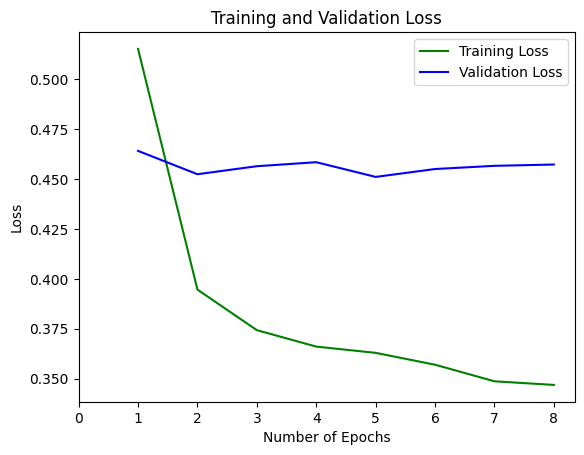

In [15]:
# Training and Validation Loss
import numpy as np
import matplotlib.pyplot as plt

# Get the training and validation loss
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = np.arange(1, len(loss_train) + 1)  # Adapt to the actual number of epochs

# Plotting
plt.plot(epochs, loss_train, 'g', label='Training Loss')
plt.plot(epochs, loss_val, 'b', label='Validation Loss')
plt.xticks(np.arange(0, len(loss_train) + 1, step=max(1, len(loss_train)//10)))
plt.title('Training and Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


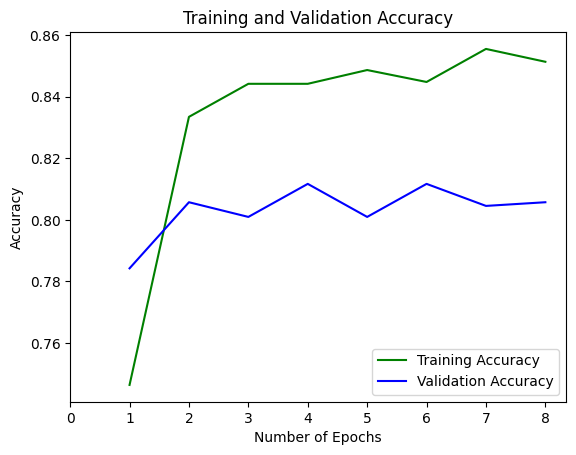

In [16]:
# Training and Validation Accuracy
import numpy as np
import matplotlib.pyplot as plt

# Get the training and validation accuracy
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = np.arange(1, len(acc_train) + 1)  # Adapt to the actual number of epochs

# Plotting
plt.plot(epochs, acc_train, 'g', label='Training Accuracy')
plt.plot(epochs, acc_val, 'b', label='Validation Accuracy')
plt.xticks(np.arange(0, len(acc_train) + 1, step=max(1, len(acc_train)//10)))
plt.title('Training and Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')  # Corrected y-axis label
plt.legend()
plt.show()

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       673
           1       0.87      0.84      0.86      1125

    accuracy                           0.82      1798
   macro avg       0.81      0.82      0.81      1798
weighted avg       0.83      0.82      0.82      1798



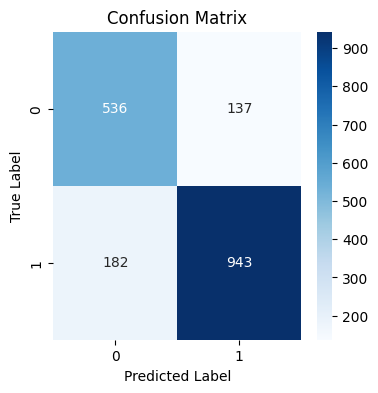

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict on the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # Convert probabilities to binary 0/1 predictions

# Define and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, cbar=True, fmt='d', cmap="Blues")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

# Print the classification report
print(classification_report(y_test, y_pred))


In [18]:
### Save
model.save('model.h5')

In [20]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']